#### 📥 Importing Libraries and Linked to SQL database

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import mysql.connector
from pandas import DataFrame

db = mysql.connector.connect(host ='localhost', user ='root', password ='jamali,786', database ='delivery_db')
cursor= db.cursor()


### Q1: Total number of orders by Vehicle in the dataset.

In [18]:
query = "SELECT vehicle_type, COUNT(*) AS Total_orders FROM courier_data GROUP BY vehicle_type;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['vehicle_type', 'Total_orders'])
print(df)

  vehicle_type  Total_orders
0         Bike          9156
1       E-Bike           810
2      Bicycle            15


Text(0, 0.5, 'Total Orders')

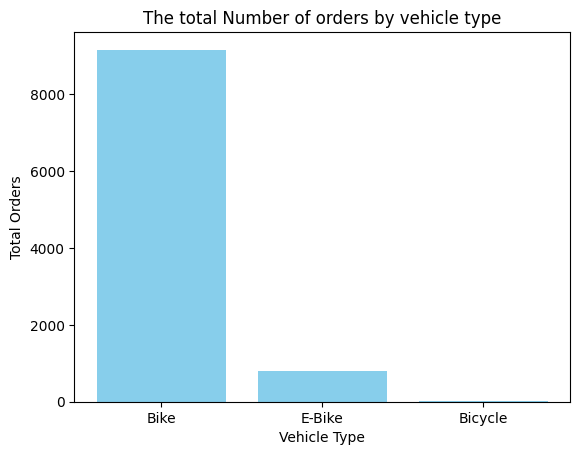

In [19]:
plt.bar(df['vehicle_type'], df['Total_orders'], color = 'skyblue')
plt.title("The total Number of orders by vehicle type")
plt.xlabel('Vehicle Type')
plt.ylabel('Total Orders')

>**The majority of deliveries are completed using Bikes (9,156 orders), which dominate overall usage. E-Bikes (810 orders) are used occasionally, while Bicycles (15 orders) contribute an insignificant share.**

### Q2: Count of orders by traffic condition (traffic).

In [20]:
query = "SELECT traffic, COUNT(*) AS Total_orders FROM courier_data GROUP BY traffic ORDER BY Total_orders DESC;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Traffic', 'Total_orders'])
print(df)

     Traffic  Total_orders
0       High          3641
1   Moderate          2215
2  Very High          1770
3        Low          1724
4   Very Low           631


Text(0, 0.5, 'Total Orders')

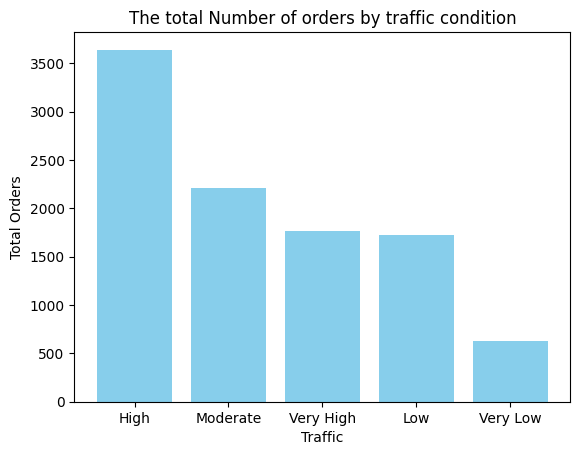

In [21]:
plt.bar(df['Traffic'], df['Total_orders'], color = 'skyblue')
plt.title("The total Number of orders by traffic condition")
plt.xlabel('Traffic')
plt.ylabel('Total Orders')

>**Deliveries are most frequently made in High traffic conditions (3,641 orders), followed by Moderate traffic (2,215 orders). Deliveries in Very High (1,770) and Low traffic (1,724) are almost equal, while Very Low traffic (631 orders) has the least activity.**

### Q3: Number of unique drivers.

In [17]:
query = "SELECT COUNT(DISTINCT driver_id) AS Id_Count FROM courier_data;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['ID_count'])
print(df)

   ID_count
0      1285


>**The dataset contains 1,285 unique drivers (ID_count) recorded.**

### Q4: Minimum, maximum, and average distance of deliveries by weather.

In [18]:
query = "SELECT weather, MIN(distance) AS Min_Distance, ROUND(MAX(distance), 2) AS Max_distance, ROUND(AVG(distance), 2) AS Avg_Distance FROM courier_data GROUP BY weather ORDER BY Avg_Distance DESC;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Weather', 'Nin_Distance', 'Max_distance', 'Avg_Distance'])
print(df)

         Weather  Nin_Distance  Max_distance  Avg_Distance
0  Partly Cloudy          1.84         37.64         16.54
1          Clear          1.55         38.18         16.28
2         Cloudy          1.83         38.18         15.71
3           Rain          4.22         30.40         13.78
4          Foggy          1.56         38.18         12.15


Text(0, 0.5, 'Avg_Distance')

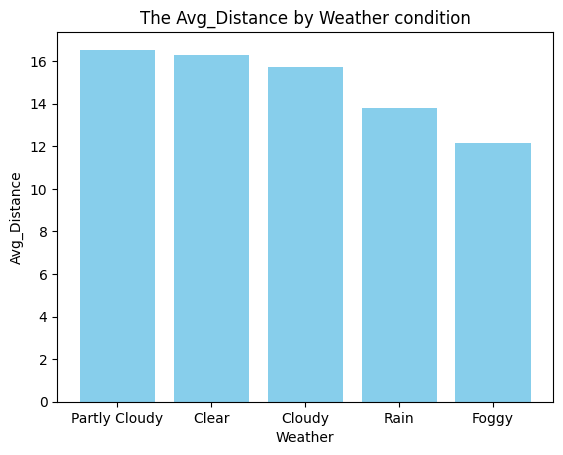

In [34]:
plt.bar(df['Weather'], df['Avg_Distance'], color = 'skyblue')
plt.title("The Avg_Distance by Weather condition")
plt.xlabel('Weather')
plt.ylabel('Avg_Distance')

>**Delivery distances vary slightly by weather. The longest average distance occurs under Partly Cloudy conditions (16.54 km), followed by Clear (16.28 km) and Cloudy (15.71 km). Deliveries during Rain (13.78 km) and especially Foggy conditions (12.15 km) tend to be shorter, likely due to safety or efficiency concerns.**

### Q5 Average driver rating by traffic level.

In [40]:
query = "SELECT traffic AS Traffic_level, ROUND(AVG(driver_rating), 2) AS Avg_Rating FROM courier_data GROUP BY traffic ORDER BY Avg_rating desc;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Traffic', 'Avg_rating'])
print(df)

     Traffic  Avg_rating
0        Low        4.67
1   Very Low        4.67
2   Moderate        4.65
3       High        4.61
4  Very High        4.58


Text(0, 0.5, 'Total Orders')

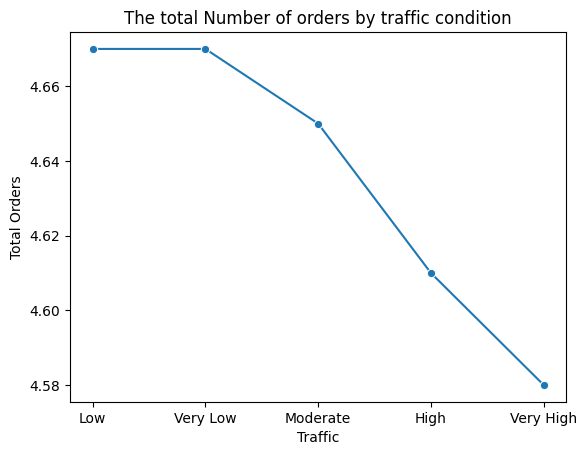

In [43]:
sns.lineplot(data=df, x='Traffic', y='Avg_rating', marker='o')
plt.title("The total Number of orders by traffic condition")
plt.xlabel('Traffic')
plt.ylabel('Total Orders')

>**Driver ratings remain consistently high across all traffic conditions, but a pattern emerges: ratings are slightly lower in Very High traffic (4.58) and increase steadily as traffic eases, peaking at Low and Very Low traffic (4.67). This suggests heavier traffic may negatively affect customer experience or delivery satisfaction.**

### Q6: Youngest and oldest driver ages.

In [22]:
query = "SELECT MIN(driver_age) AS Min_Age, MAX(driver_age) AS Max_age, ROUND(AVG(driver_age), 0) AS Avg_Age FROM courier_data;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Min_Age', 'Max_age', 'Avg_Age'])
print(df)

   Min_Age  Max_age Avg_Age
0       20       39      30


>**The drivers in the dataset are aged between 20 and 39 years, with an average age of 30 years. This indicates a relatively young workforce, concentrated around early adulthood.**

### Q7: Top 10 drivers with highest average rating

In [23]:
query = "SELECT driver_id, AVG(driver_rating) AS Avg_rating FROM courier_data GROUP BY driver_id ORDER BY Avg_rating DESC LIMIT 10;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Driver_id', 'Rating'])
print(df)

        Driver_id  Rating
0   KOCRES20DEL03     5.0
1   ALHRES18DEL03     5.0
2   GOARES14DEL01     5.0
3  AURGRES17DEL03     5.0
4   AGRRES12DEL01     5.0
5  AURGRES03DEL03     5.0
6   BHPRES17DEL01     5.0
7   KOCRES11DEL03     5.0
8   BHPRES19DEL01     5.0
9   BHPRES11DEL01     5.0


>**The top 10 drivers all hold a perfect 5.0 rating, showing consistently high performance and customer satisfaction.**

### Q8: Most common weather condition.

In [30]:
query = "SELECT weather, COUNT(*) AS Frequency FROM courier_data GROUP BY weather ORDER BY COUNT(*) DESC;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Weather', 'Total_orders'])
print(df)

         Weather  Total_orders
0          Foggy          4699
1          Clear          3259
2         Cloudy          1025
3           Rain           536
4  Partly Cloudy           462


Text(0, 0.5, 'Total Orders')

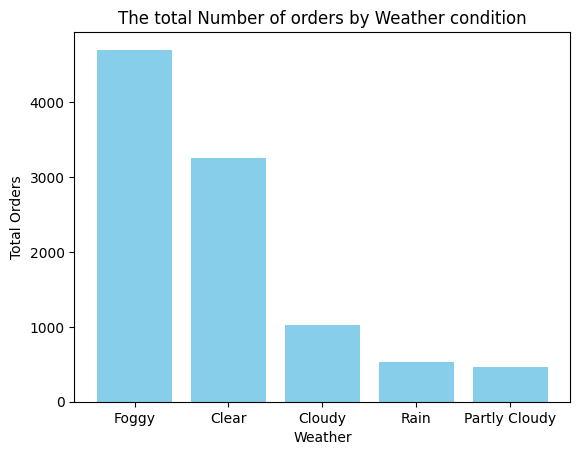

In [31]:
plt.bar(df['Weather'], df['Total_orders'], color = 'skyblue')
plt.title("The total Number of orders by Weather condition")
plt.xlabel('Weather')
plt.ylabel('Total Orders')

>**Deliveries are most frequent in Foggy weather (4,699 orders), followed by Clear conditions (3,259 orders). Significantly fewer deliveries happen during Cloudy (1,025), Rain (536), and Partly Cloudy (462) conditions. This suggests that delivery demand is highest in foggy and clear weather, while rainy and partly cloudy conditions see much less activity.**

### Q9: Orders by vehicle type and traffic condition.

In [44]:
query = "SELECT vehicle_type, traffic, COUNT(*) AS orders FROM courier_data GROUP BY vehicle_type , traffic ORDER BY orders DESC;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Vehicle','Traffic', 'Total_orders'])
print(df)

    Vehicle    Traffic  Total_orders
0      Bike       High          3329
1      Bike   Moderate          2041
2      Bike  Very High          1627
3      Bike        Low          1582
4      Bike   Very Low           577
5    E-Bike       High           302
6    E-Bike   Moderate           172
7    E-Bike  Very High           142
8    E-Bike        Low           140
9    E-Bike   Very Low            54
10  Bicycle       High            10
11  Bicycle        Low             2
12  Bicycle   Moderate             2
13  Bicycle  Very High             1


Text(0.5, 1.0, 'The total Number of orders by vehicle type and traffic condition')

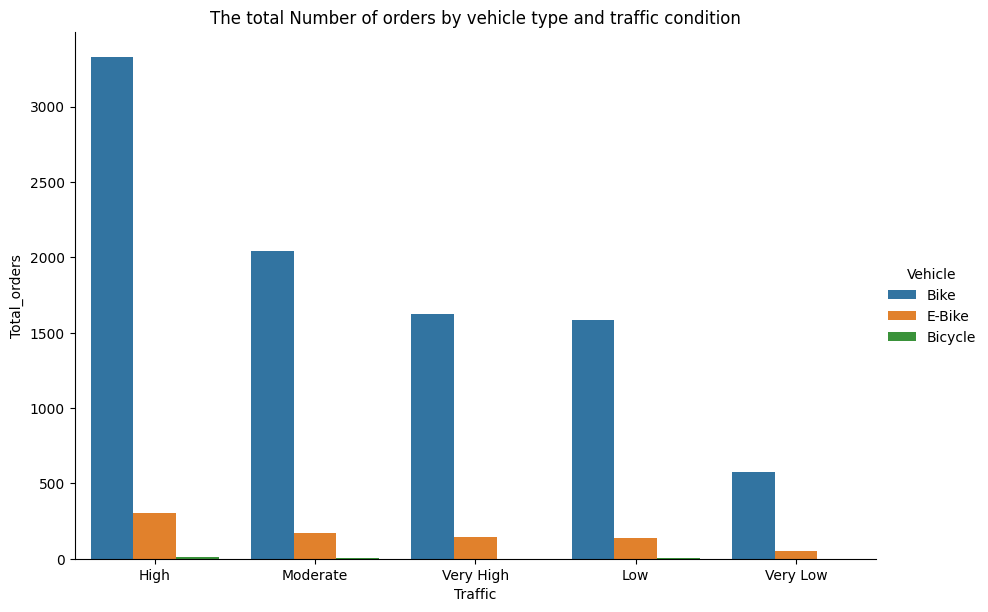

In [50]:
sns.catplot(data=df, x='Traffic', y='Total_orders', hue='Vehicle', kind='bar', height=6, aspect=1.5)
plt.title("The total Number of orders by vehicle type and traffic condition")

>**Most deliveries are done using Bikes across all traffic conditions, with the highest count in High traffic (3,329 orders). E-Bikes contribute a smaller share, also peaking in High traffic (302 orders), while Bicycles are almost negligible across all traffic levels. This shows that Bikes dominate regardless of traffic, E-Bikes serve as a secondary option, and Bicycles are nearly phased out.**

### Q10: Rank drivers by average rating.

In [30]:
query = "select driver_id, avg(driver_rating) as Avg_rating,dense_rank() over (order by avg(driver_rating) desc) as Ranking from courier_data group by driver_id;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Driver_id', 'Avg_rating', 'Ranking'])
print(df)

            Driver_id  Avg_rating  Ranking
0       ALHRES18DEL03         5.0        1
1       KOCRES11DEL03         5.0        1
2       AGRRES12DEL01         5.0        1
3       KNPRES03DEL02         5.0        1
4      AURGRES17DEL03         5.0        1
...               ...         ...      ...
1280    AGRRES04DEL03         4.0      667
1281  LUDHRES010DEL02         3.8      668
1282   LUDHRES20DEL01         3.6      669
1283    ALHRES01DEL03         3.1      670
1284    GOARES03DEL02         2.6      671

[1285 rows x 3 columns]


>**Driver ratings range from a perfect 5.0 (top-ranked drivers) down to 2.6 (lowest-ranked driver). Many drivers share the top rank with a perfect score, showing a large pool of consistently high performers.**

### Q11: Do higher-rated drivers get longer/shorter deliveries?

In [51]:
query = "SELECT driver_rating AS Rating, ROUND(AVG(distance), 2) AS Avg_dis FROM courier_data GROUP BY driver_rating ORDER BY driver_rating DESC; "
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Rating', 'Avg_distance'])
print(df)

    Rating  Avg_distance
0      5.0         13.15
1      4.9         13.86
2      4.8         13.63
3      4.7         13.64
4      4.6         14.37
5      4.5         14.21
6      4.4         15.24
7      4.3         14.36
8      4.2         13.89
9      4.1         15.10
10     4.0         14.29
11     3.9         18.46
12     3.8         21.21
13     3.7         20.95
14     3.6         19.91
15     3.5         19.02
16     3.4         22.05
17     3.3         24.13
18     3.2         23.49
19     3.1         23.32
20     3.0         26.32
21     2.9         24.14
22     2.8         16.07
23     2.7         19.79
24     2.6         21.44
25     2.5         23.01


Text(0.5, 1.0, 'The Avg_distance by Driver rating')

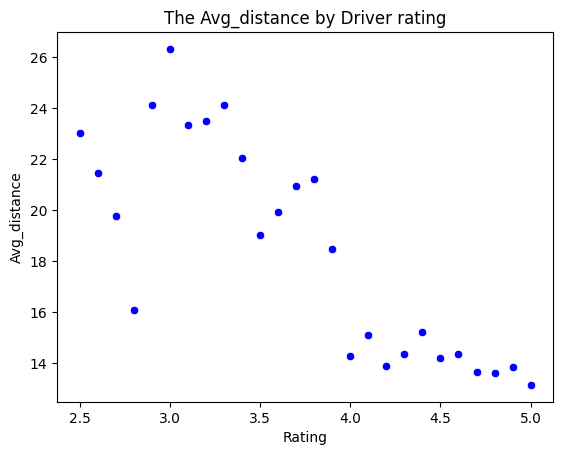

In [53]:
sns.scatterplot(data=df, x='Rating', y='Avg_distance', color='blue')
plt.title("The Avg_distance by Driver rating")

>**The data shows an inverse relationship between driver ratings and average delivery distance. Drivers with high ratings (4.5–5.0) generally handle shorter trips (≈13–15 km), while lower-rated drivers (3.0–3.5) are assigned or end up handling much longer trips (≈20–26 km). This suggests that customer satisfaction may decline with longer delivery distances, or that longer routes are more challenging for drivers to maintain service quality.**

### Q12: Percentage contribution of each order type.

In [4]:
query = "SELECT order_type, COUNT(*) AS order_count, ROUND((COUNT(*) / (SELECT COUNT(*) FROM courier_data)) * 100,2) AS percentage FROM courier_data GROUP BY order_type ORDER BY percentage DESC;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Order_Type', 'Total_orders','Percentage'])
print(df)

  Order_Type  Total_orders Percentage
0      Snack          2545      25.50
1       Meal          2524      25.29
2     Drinks          2503      25.08
3     Buffet          2409      24.14


Text(0.5, 1.0, 'Order Type Distribution')

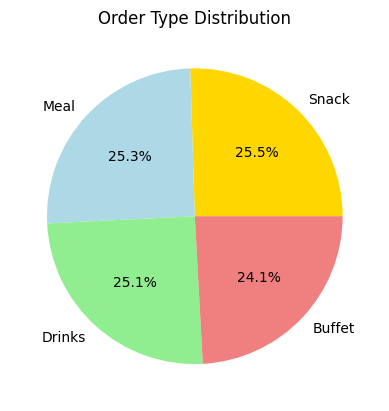

In [15]:
plt.pie(df['Percentage'].astype(float),labels=df['Order_Type'], autopct= '%1.1f%%', colors= ['gold', 'lightblue', 'lightgreen', 'lightcoral'])
plt.title('Order Type Distribution')

>**Orders are almost evenly distributed across all categories. Snacks (2,545 orders) lead slightly, followed closely by Meals (2,524) and Drinks (2,503). Buffet orders (2,409) are only marginally lower, showing that all order types are popular with relatively little difference in demand.**

### Q13: Average temperature & humidity for each traffic condition.

In [56]:
query = "SELECT traffic,ROUND(AVG(temp), 2) AS Avg_temp,ROUND(AVG(humidity), 2) AS Avg_Humidity FROM courier_data GROUP BY traffic ORDER BY Avg_temp DESC;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Traffic', 'Avg_temp','Avg_humidity'])
print(df)

     Traffic  Avg_temp  Avg_humidity
0       High     23.30         67.56
1  Very High     23.07         63.60
2        Low     22.65         66.40
3   Very Low     22.60         66.26
4   Moderate     22.57         65.72


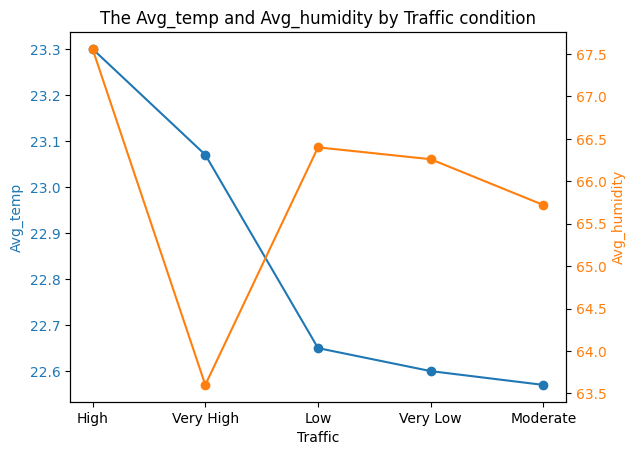

In [61]:
#Dual-axis Line Chart → X-axis = Traffic, left Y-axis = Avg_temp, right Y-axis = Avg_humidity (to show both trends on one graph).
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Traffic')
ax1.set_ylabel('Avg_temp', color=color)
ax1.plot(df['Traffic'], df['Avg_temp'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Avg_humidity', color=color)
ax2.plot(df['Traffic'], df['Avg_humidity'], marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("The Avg_temp and Avg_humidity by Traffic condition")
plt.show()

>**Weather conditions stay fairly consistent across different traffic levels. High traffic has the warmest average temperature (23.3°C) and slightly higher humidity (67.6%). In contrast, Moderate and Very Low traffic show cooler average temperatures (≈22.6°C) with humidity around 65–66%. Overall, variations are minor, suggesting traffic conditions are not strongly influenced by temperature or humidity.** 

### Q14: Driver with most deliveries in high traffic.

In [63]:
query = "SELECT driver_id, traffic, total FROM (SELECT driver_id, traffic, COUNT(*) AS total FROM courier_data GROUP BY driver_id , traffic) AS tab WHERE traffic = 'Very High' ORDER BY total DESC LIMIT 10;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Driver_id','Traffic', 'Total_orders'])
print(df)

        Driver_id    Traffic  Total_orders
0  CHENRES09DEL02  Very High            13
1   MUMRES07DEL01  Very High            12
2  CHENRES06DEL02  Very High            12
3   MUMRES19DEL03  Very High            10
4   HYDRES12DEL03  Very High            10
5   MUMRES20DEL03  Very High            10
6  CHENRES05DEL02  Very High            10
7  BANGRES18DEL01  Very High            10
8   HYDRES15DEL02  Very High             9
9  BANGRES08DEL01  Very High             9


Text(0.5, 1.0, 'The total Number of orders by Top 10 Drivers in Very High traffic condition')

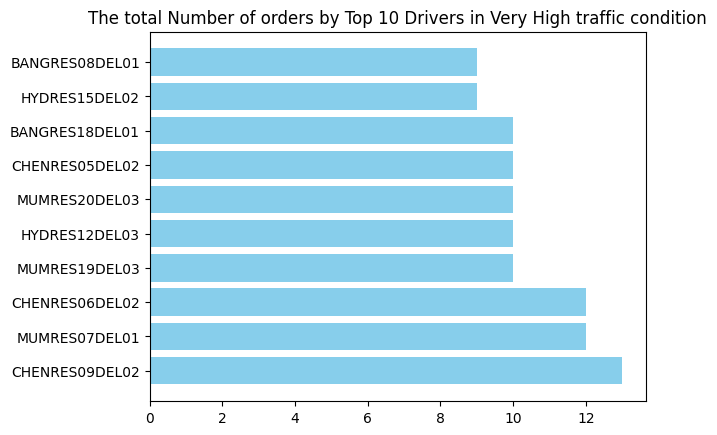

In [65]:
#Horizontal Bar Chart → Driver IDs on the Y-axis, Total_orders on the X-axis (best for comparing drivers clearly).
plt.barh(df['Driver_id'], df['Total_orders'], color = 'skyblue')
plt.title("The total Number of orders by Top 10 Drivers in Very High traffic condition")

>**The top-performing drivers in Very High traffic conditions complete between 9 and 13 orders each. This shows a relatively even distribution of workload among top drivers in heavy traffic environments.**

### Q15: Distribution of orders per driver (min, max, avg, std).

In [10]:
query = "SELECT MIN(Orders) AS Min_order, MAX(Orders) AS Max_orders, AVG(Orders) AS Avg_orders, STDDEV(Orders) AS Std_orders FROM (SELECT driver_id, COUNT(*) AS Orders FROM courier_data GROUP BY driver_id) AS tab;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Min_order', 'Max_order','Avg_order','STD_order'])
print(df)

   Min_order  Max_order Avg_order  STD_order
0          1         22    7.7673   5.112845


>**Drivers completed anywhere from 1 to 22 orders, with an average of 8 orders. The standard deviation (5.1) shows a wide variation in workloads, meaning some drivers handle significantly more orders than others.**

### Q16: Weather-traffic combination with highest avg distance.

In [37]:
query = "SELECT weather, traffic, ROUND(AVG(distance), 2) AS Avg_dist FROM courier_data GROUP BY weather , traffic ORDER BY Avg_dist DESC LIMIT 5;"
cursor.execute(query)
result = cursor.fetchall()
df = DataFrame(result, columns=['Weather','Traffic', 'avg_distance'])
print(df)

         Weather    Traffic  avg_distance
0          Clear  Very High         26.86
1           Rain  Very High         24.45
2         Cloudy  Very High         24.35
3          Foggy  Very High         23.81
4  Partly Cloudy  Very High         23.36


Text(0, 0.5, 'Total Orders')

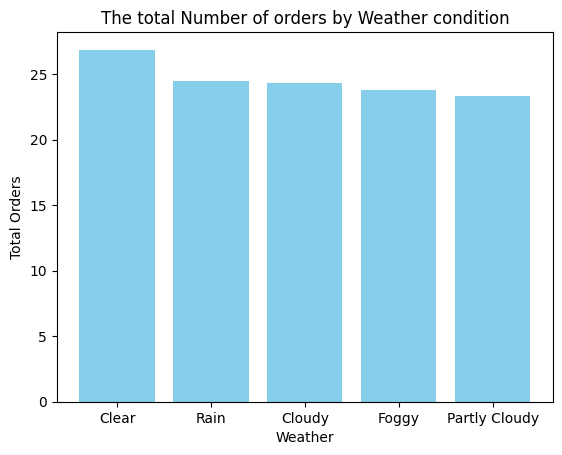

In [39]:
plt.bar(df['Weather'], df['avg_distance'], color = 'skyblue')
plt.title("The total Number of orders by Weather condition")
plt.xlabel('Weather')
plt.ylabel('Total Orders')

>**In Very High traffic conditions, delivery distances remain long across all weather types, ranging from 23.4 km to 26.9 km. The longest average distance occurs under Clear weather (26.86 km), while Partly Cloudy weather (23.36 km) shows the shortest. This indicates that heavy traffic consistently pushes delivery distances higher, with only slight variation by weather.**